In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
import pickle

In [3]:
rain = pd.read_csv("C:\\Users\\Uzair Sufiyan\\Desktop\\SP19-BCS-029\\weatherAUS.csv")

In [4]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
rain.shape

(145460, 23)

In [6]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
rain.isnull().values.sum()

343248

In [8]:
rain.describe(exclude=[object]).round()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


In [9]:
rain.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [10]:
rain._get_numeric_data()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [11]:
#finding categorical features
#list comprehension

features = [name for name in rain.columns if rain[name].dtype=='O']
print("Length:{}" .format(len(features)))
print("Categorical Features:",features)

Length:7
Categorical Features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
type(features)

list

In [13]:
#finding numerical features

numerical = [name for name in rain.columns if rain[name].dtype!='O' ]
print("Length:{}".format(len(numerical)))
print("Numerical Features:",numerical)

Length:16
Numerical Features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
for each_value in features:
    unique_values = len(rain[each_value].unique())
    print("Cardinality of {} is: {}".format(each_value, unique_values))

Cardinality of Date is: 3436
Cardinality of Location is: 49
Cardinality of WindGustDir is: 17
Cardinality of WindDir9am is: 17
Cardinality of WindDir3pm is: 17
Cardinality of RainToday is: 3
Cardinality of RainTomorrow is: 3


In [15]:
rain.drop('Date', axis=1, inplace=True)

In [16]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


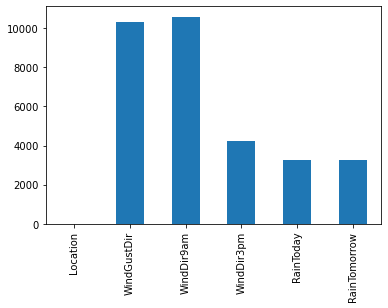

In [17]:
#finding missing or null values in categroical features
features = [name for name in rain.columns if rain[name].dtype=='O']
print(rain[features].isnull().sum())
rain[features].isnull().sum().plot(kind="bar")
plt.show()

In [18]:
#put missing values in categorical features using mode
cat_features_with_null = [name for name in features if rain[name].isnull().sum()]
for each_val in cat_features_with_null:
    mode_value = rain[each_val].mode()[0]
    rain[each_val].fillna(mode_value, inplace=True)

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


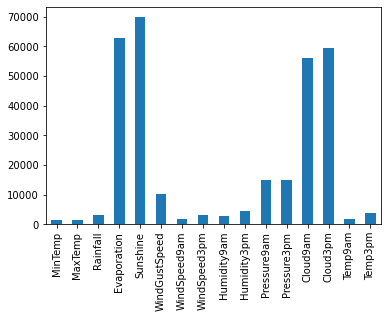

In [19]:
##finding missing or null values in numerical features
numerical = [name for name in rain.columns if rain[name].dtype!='O' ]
print(rain[numerical].isnull().sum())
rain[numerical].isnull().sum().plot(kind="bar")
plt.show()

In [20]:
#we will put values in numeical features using mean. since mean is sensitive to outliers so we remove them first
numerical_feat_with_outliers = ["MinTemp",
"MaxTemp",
"Rainfall",
"Evaporation",      
"Sunshine",         
"WindGustSpeed",    
"WindSpeed9am",      
"WindSpeed3pm",      
"Humidity9am",       
"Humidity3pm",
"Pressure9am",      
"Pressure3pm",      
"Cloud9am",         
"Cloud3pm",         
"Temp9am" ,          
"Temp3pm"]

for features in numerical_feat_with_outliers:
    q1 = rain[features].quantile(0.25)
    q3 = rain[features].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[features]<lower_limit,features] = lower_limit
    rain.loc[rain[features]>upper_limit,features] = upper_limit

In [21]:
#we will put values in numeical features using mean
num_feature_with_null = [name for name in numerical if rain[name].isnull().sum()]
for each_val in num_feature_with_null:
    mean_value = rain[each_val].mean()
    rain[each_val].fillna(mean_value,inplace=True)

In [22]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [23]:
def encode_data(feature_name):

    
#This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.


    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

In [24]:
rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

In [25]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [26]:
#split data into dependent and independent features 
X = rain.drop(['RainTomorrow'],axis=1) #independent
y = rain['RainTomorrow'] #dependent

In [27]:
#now we will control overfitting by ExtraTreesRegressor
#Feature importance describes which features are relevant to build a model.
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.0396596 , 0.03579155, 0.03450938, 0.04033659, 0.02693102,
       0.04814259, 0.03488625, 0.06104608, 0.03579537, 0.03674178,
       0.03636456, 0.03758389, 0.04289614, 0.19613816, 0.04194225,
       0.05485079, 0.02716748, 0.04070867, 0.03295161, 0.03321849,
       0.06233776])

<AxesSubplot:>

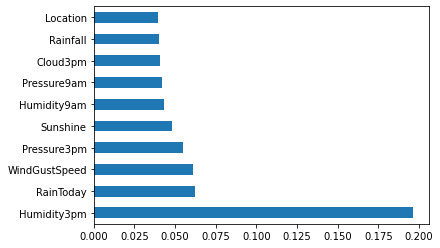

In [28]:
graph = pd.Series(etr_model.feature_importances_,index=X.columns)
graph.nlargest(10).plot(kind='barh')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[21532,  1194],
       [ 3345,  3021]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision Score: {}".format(precision_score(y_test,y_pred)))
print("Recall Score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy Score: 0.8439777258352812
Precision Score: 0.7167259786476868
Recall Score: 0.47455230914231855
F1 Score: 0.5710235327473773


In [35]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

#no fitting issues as both test and train scores are almost equal

Train Data Score: 0.843805857280352
Test Data Score: 0.8439777258352812


In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model =model.fit(X_train, y_train)
y_pred =model.predict(X_test)

print("Accuracy Score for naive bayes is : {}".format(accuracy_score(y_test,y_pred)))
print("Precision Score: {}".format(precision_score(y_test,y_pred)))
print("Recall Score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy Score for naive bayes is : 0.7862298913790733
Precision Score: 0.5091474797759801
Recall Score: 0.6426327364121898
F1 Score: 0.5681549892368586


In [37]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy Score for KNN is : {}".format(accuracy_score(y_test,y_pred)))
print("Precision Score: {}".format(precision_score(y_test,y_pred)))
print("Recall Score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy Score for KNN is : 0.8276502131170081
Precision Score: 0.6388090349075976
Recall Score: 0.48868991517436383
F1 Score: 0.5537557849768601


In [38]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree =tree.fit(X_train, y_train)
y_pred =tree.predict(X_test)

print("Accuracy Score for DecisionTreeClassifier is : {}".format(accuracy_score(y_test,y_pred)))
print("Precision Score: {}".format(precision_score(y_test,y_pred)))
print("Recall Score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy Score for DecisionTreeClassifier is : 0.7901141207204729
Precision Score: 0.5197208737864077
Recall Score: 0.5381715362865221
F1 Score: 0.5287853063744404


In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
tree =forest.fit(X_train, y_train)
y_pred =forest.predict(X_test)

print("Accuracy Score for Random Forest is : {}".format(accuracy_score(y_test,y_pred)))
print("Precision Score: {}".format(precision_score(y_test,y_pred)))
print("Recall Score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy Score for Random Forest is : 0.8552523030386361
Precision Score: 0.7574671445639187
Recall Score: 0.4979579013509268
F1 Score: 0.6008909108141409


In [42]:
with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # here scaler is an object of StandardScaler class.
    
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file) # here classifier_logreg is trained model